In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


sns.set(style='whitegrid')

df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
X = df.drop(['PassengerId', 'Fare', 'Name', 'Ticket', 'Cabin'], axis=1)  # Dropping irrelevant columns
y = df['Fare']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string to handle NaN values

In [12]:
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
X = imputer.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("🔹 R-squared:", r2_score(y_test, y_pred))
print("🔹 Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("🔹 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

🔹 R-squared: 0.4668382559194837
🔹 Mean Absolute Error: 18.361469655855807
🔹 Mean Squared Error: 825.0302747378074
🔹 RMSE: 28.723340243394524


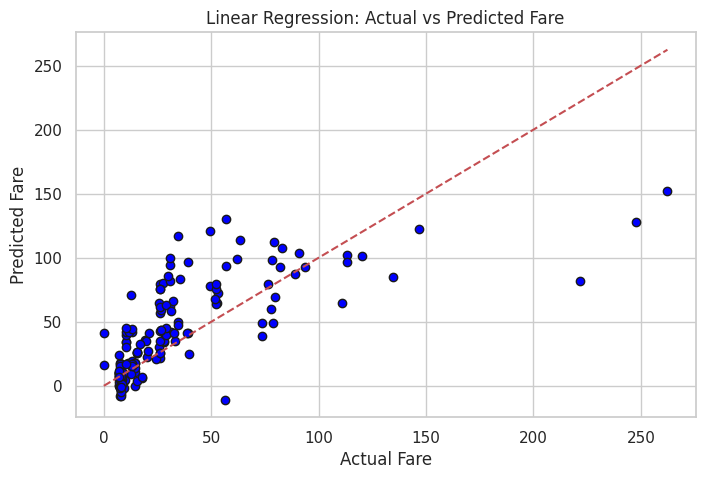

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression: Actual vs Predicted Fare")
plt.grid(True)
plt.show()